In [10]:
import pandas as pd
import matplotlib.pyplot as plt
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우의 기본 한글 폰트
plt.rcParams['axes.unicode_minus'] = False     # 마이너스 기호 깨짐 방지

In [11]:
df = pd.read_csv('para.csv')
df

,para,10 kV,12.5 kV,15 kV
0,f0,8.5149d-07,9.1749d-07,1.4087d-06
1,f1,5.9961d-16,6.2633d-16,8.3743d-16
2,f2,3.6655d+05,3.6189d+05,4.3023d+05
3,f3,2.7775d-04,2.5581d-04,2.9036d-04
4,f4,1.3716d-02,1.1684d-02,9.9301d-03
5,f5,1.5840d-03,1.4397d-03,9.3957d-04
6,f6,3.1419d-02,2.8668d-02,4.8756d-02
7,f7,4.2479d-01,6.8153d-01,7.8149d-01
8,f8,1.2186d+00,1.1609d+00,1.7526d+00
9,f9,5.3682d+00,5.2776d+00,8.6907d+00


In [12]:
for col in ['10 kV', '12.5 kV', '15 kV']:
    df[col] = df[col].str.replace('d', 'e').astype(float)


In [13]:
x = [2.64, 3.723, 4.317]
y = df[['10 kV', '12.5 kV', '15 kV']].values
y[0]

array([8.5149e-07, 9.1749e-07, 1.4087e-06])

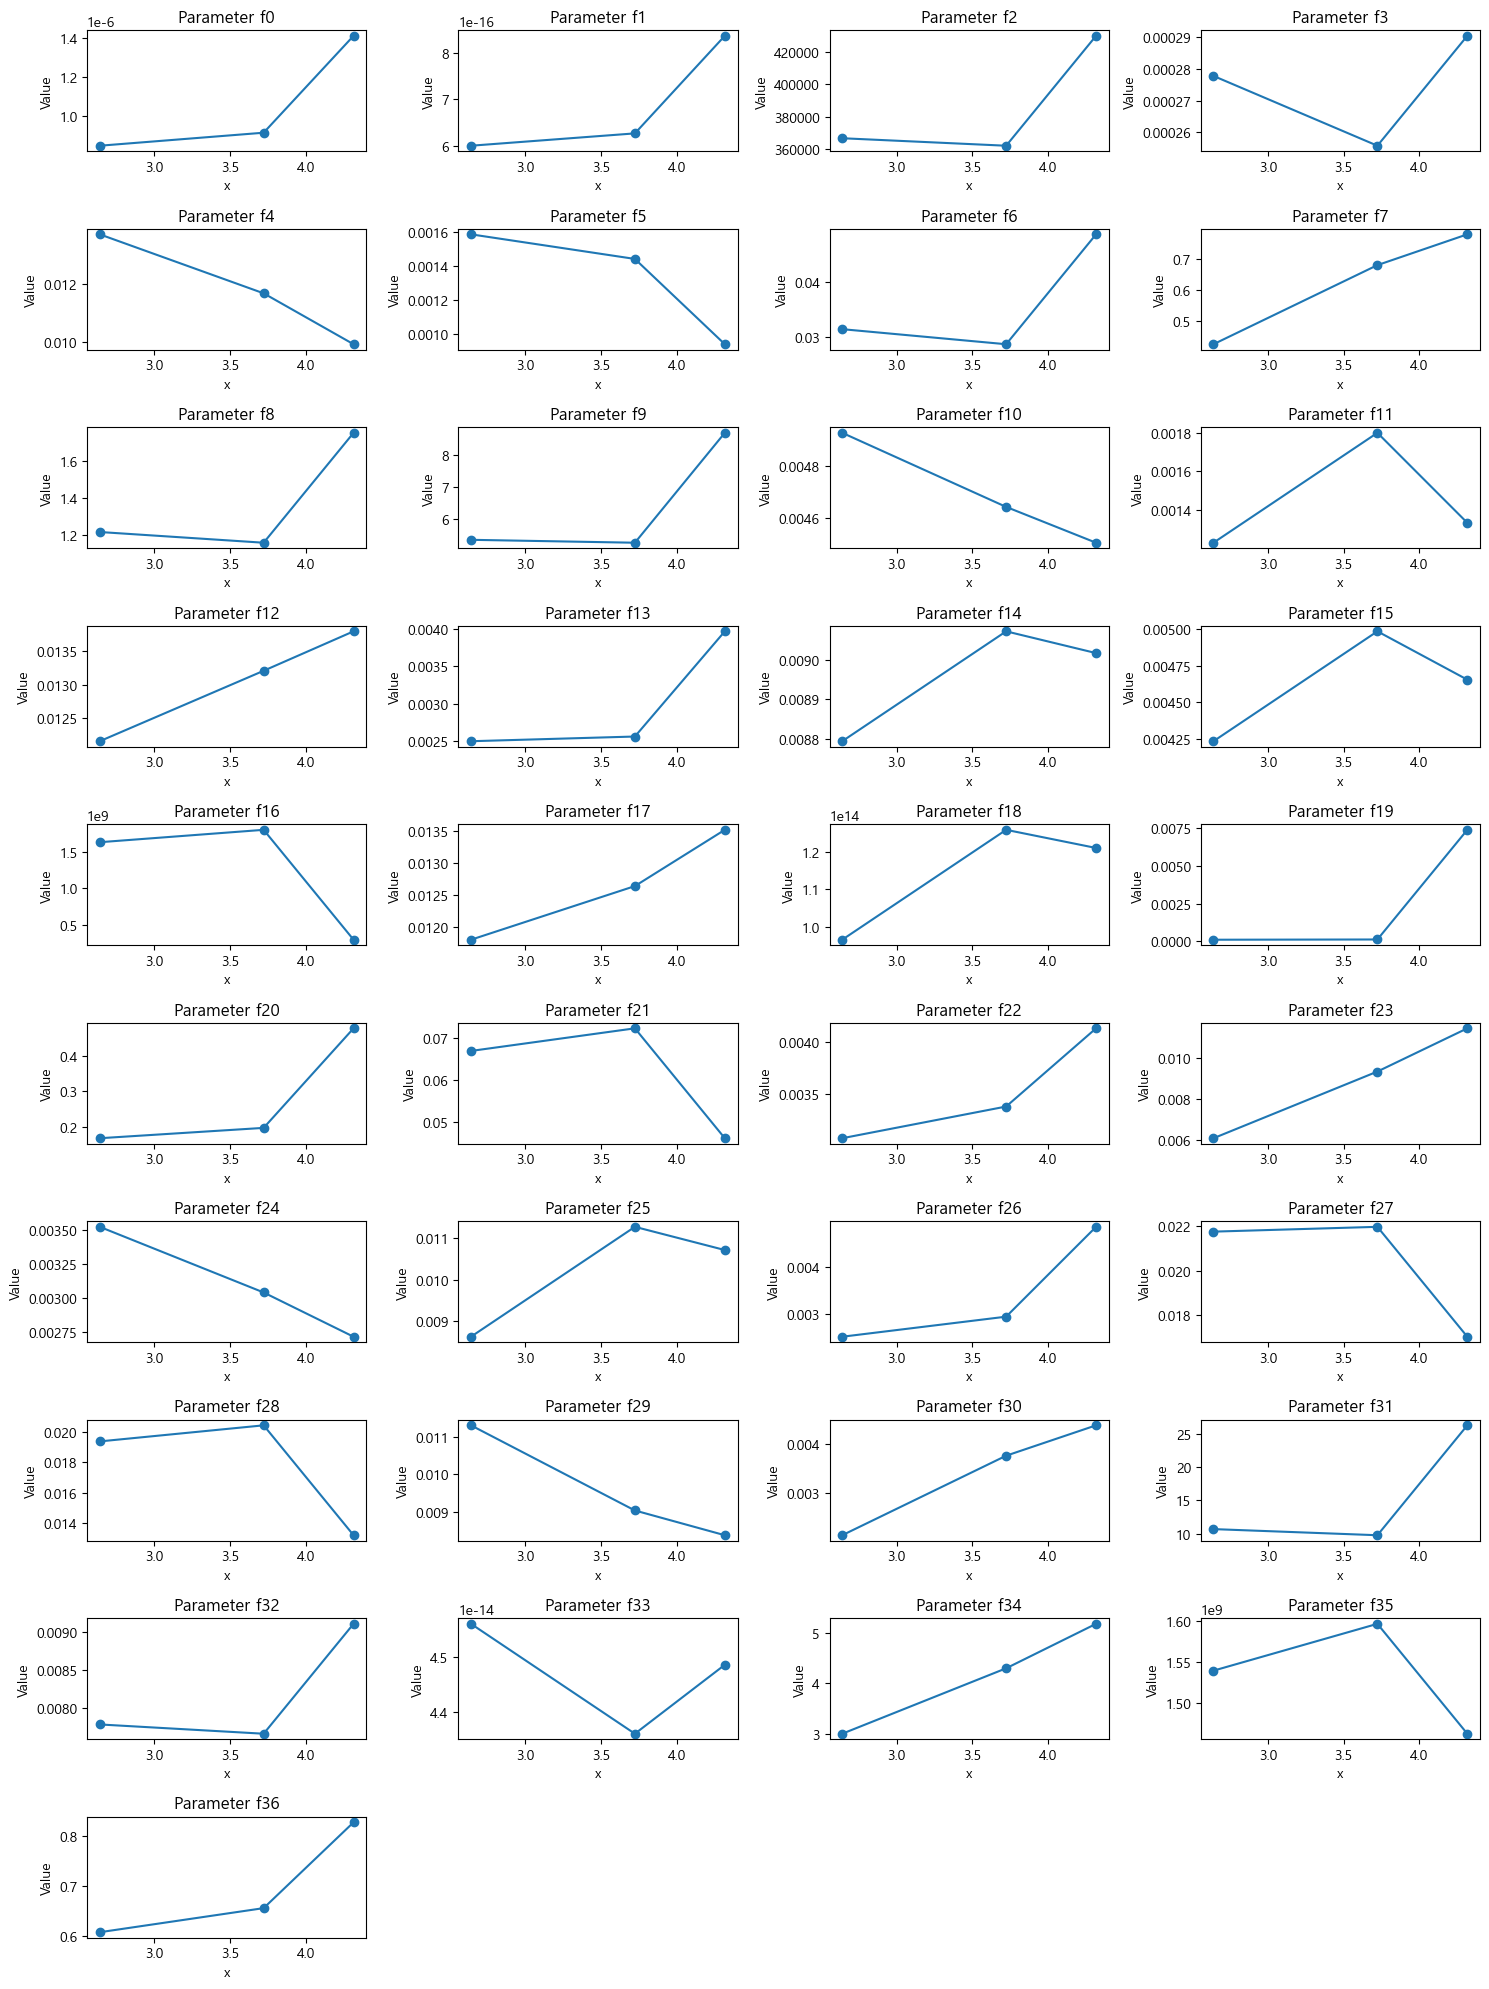

In [14]:
plt.figure(figsize=(15, 20))
for i in range(len(df)):
    plt.subplot(10, 4, i+1)
    plt.plot(x, y[i], 'o-')
    plt.title(f'Parameter {df["para"][i]}')
    plt.xlabel('x')
    plt.ylabel('Value')
plt.tight_layout()
plt.show()



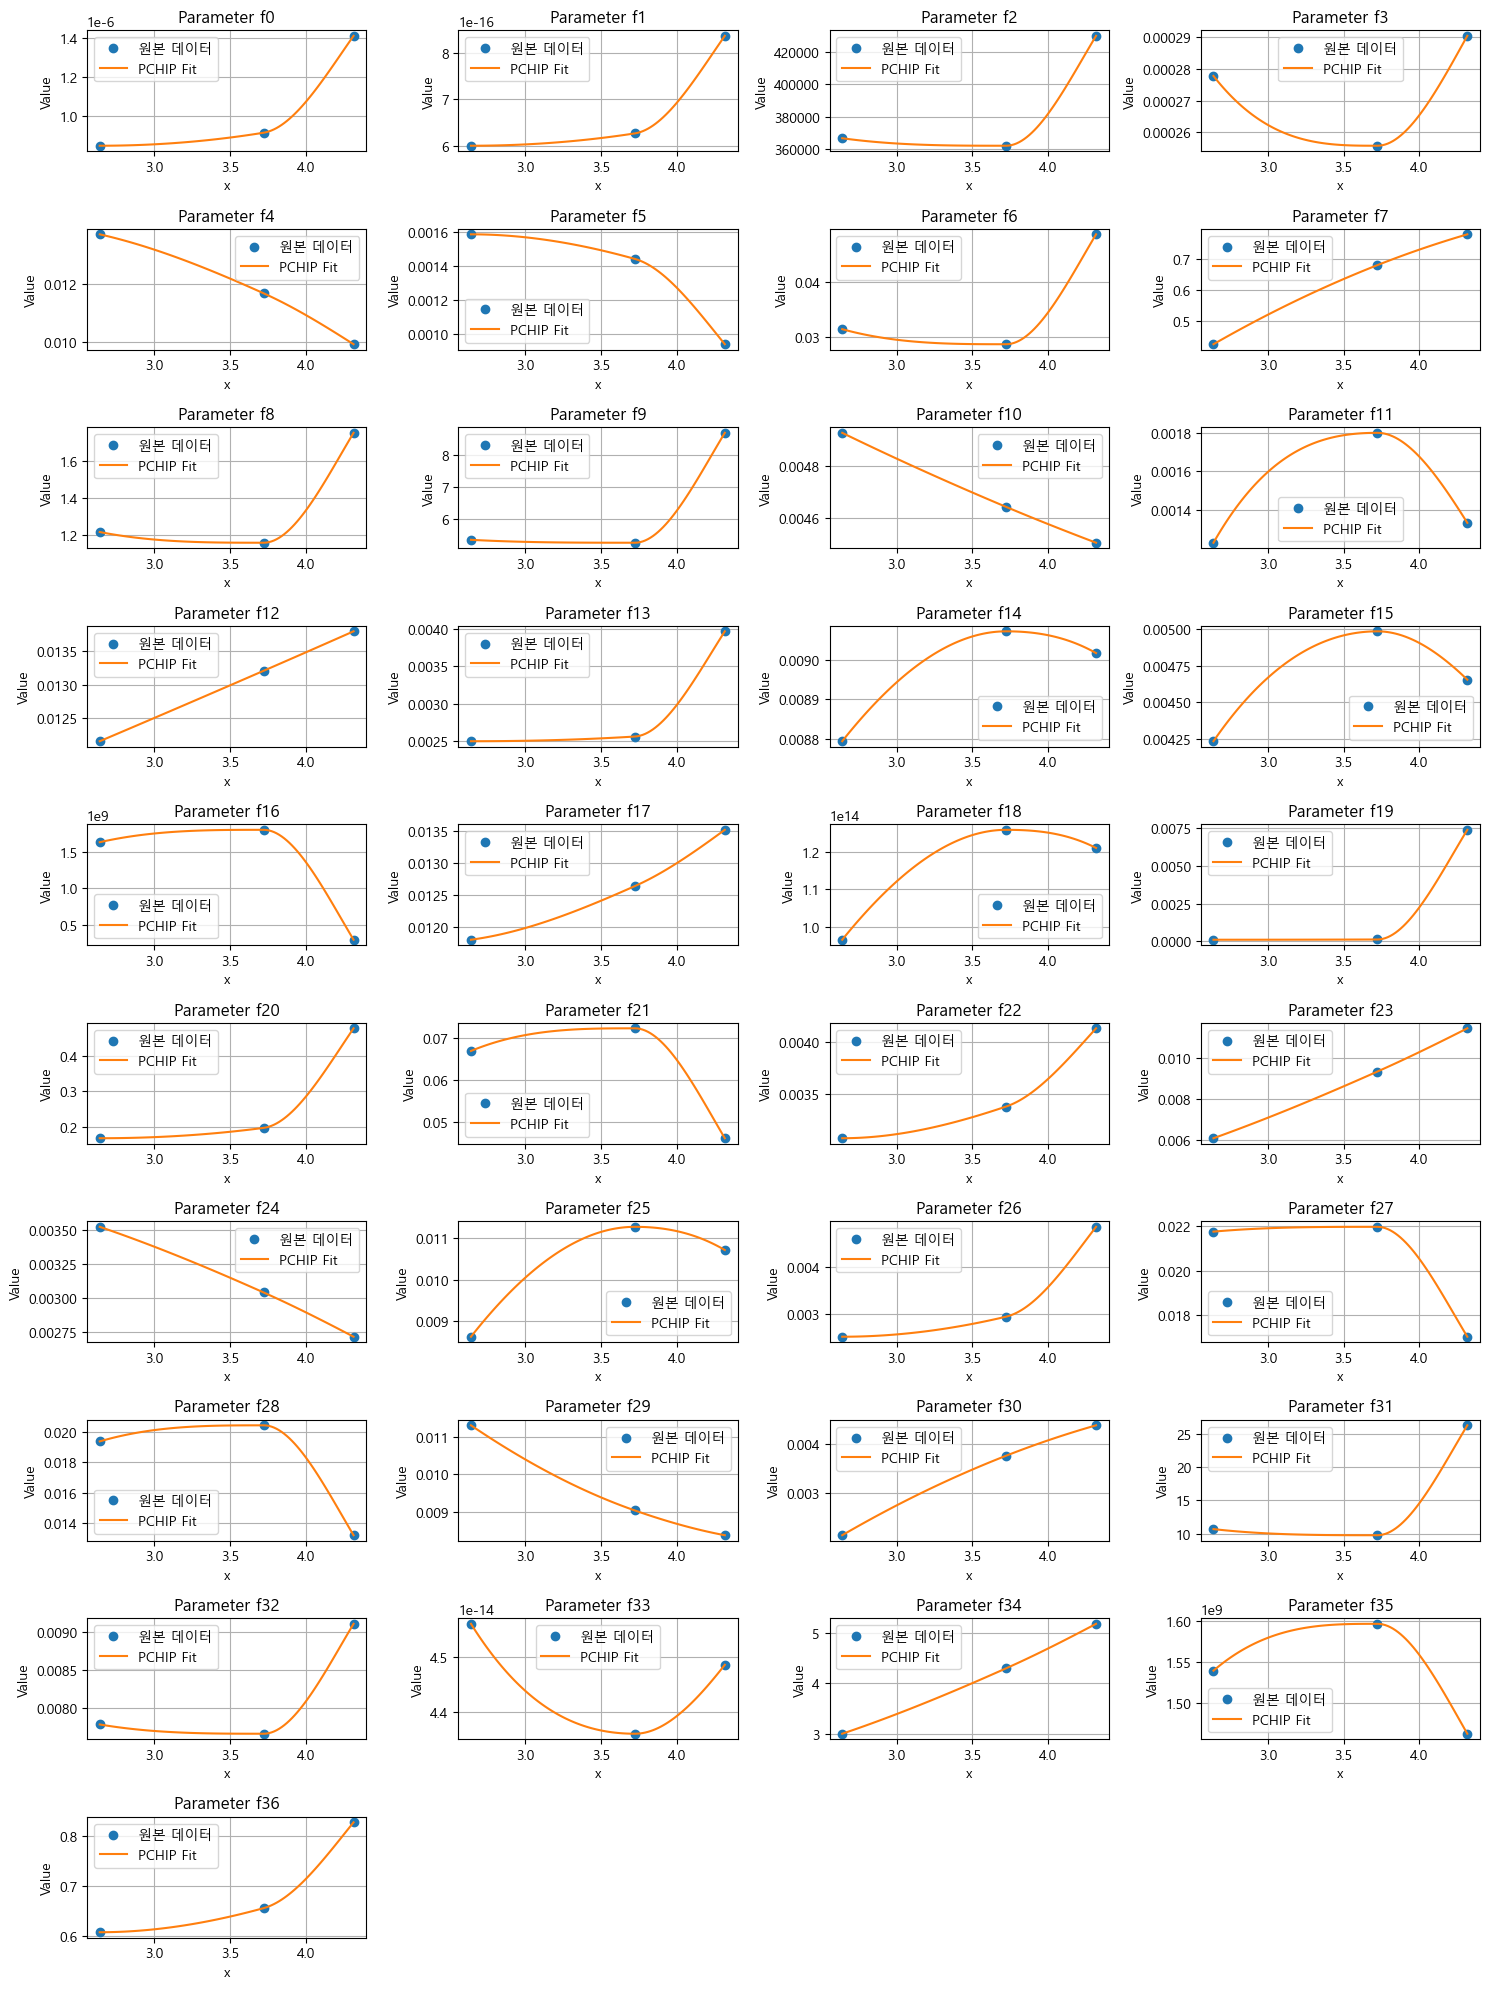

In [15]:
from scipy.interpolate import PchipInterpolator
import numpy as np

# 전체 파라미터에 대한 fitting 수행
plt.figure(figsize=(15, 20))
for i in range(len(df)):
    # 현재 파라미터 데이터 추출
    param_data = y[i]
    
    # PCHIP 인터폴레이터 생성
    pchip = PchipInterpolator(x, param_data)
    
    # 부드러운 곡선을 위한 x값 생성
    x_new = np.linspace(min(x), max(x), 100)
    
    # fitting 결과 계산
    y_new = pchip(x_new)
    
    # 서브플롯 생성
    plt.subplot(10, 4, i+1)
    plt.plot(x, param_data, 'o', label='원본 데이터')
    plt.plot(x_new, y_new, '-', label='PCHIP Fit')
    plt.title(f'Parameter {df["para"][i]}')
    plt.xlabel('x')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


f1 Fitting Parameters:
구간 3.0 - 3.5의 다항식 계수:
y = 0.00e+00(x-x₀)³ + 0.00e+00(x-x₀)² + 0.00e+00(x-x₀) + 6.20e-16

구간 3.5 - 4.0의 다항식 계수:
y = -8.00e-16(x-x₀)³ + 1.20e-15(x-x₀)² + 0.00e+00(x-x₀) + 6.20e-16



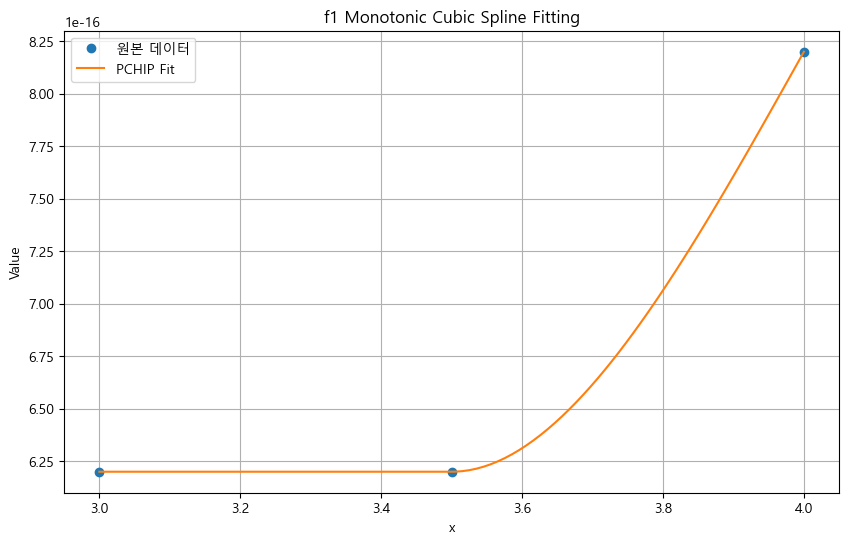


x = 3.25일 때 예측값: 6.20e-16


In [16]:
from scipy.interpolate import PchipInterpolator
import numpy as np
import matplotlib.pyplot as plt

# 예시로 f1 데이터에 적용해보겠습니다
def fit_and_plot_pchip(x_data, y_data, param_name):
    # PCHIP 인터폴레이터 생성
    pchip = PchipInterpolator(x_data, y_data)
    
    # 부드러운 곡선을 위한 더 조밀한 x 포인트 생성
    x_fine = np.linspace(min(x_data), max(x_data), 100)
    
    # fitted y값 계산
    y_fitted = pchip(x_fine)
    
    # 실제 fitting 함수 추출
    # PCHIP의 계수들 출력
    print(f"{param_name} Fitting Parameters:")
    for i in range(len(x_data)-1):
        poly_coeffs = pchip.c[:, i]
        print(f"구간 {x_data[i]:.1f} - {x_data[i+1]:.1f}의 다항식 계수:")
        print(f"y = {poly_coeffs[0]:.2e}(x-x₀)³ + {poly_coeffs[1]:.2e}(x-x₀)² + {poly_coeffs[2]:.2e}(x-x₀) + {poly_coeffs[3]:.2e}")
        print()
    
    # 그래프 그리기
    plt.figure(figsize=(10, 6))
    plt.plot(x_data, y_data, 'o', label='원본 데이터')
    plt.plot(x_fine, y_fitted, '-', label='PCHIP Fit')
    plt.title(f'{param_name} Monotonic Cubic Spline Fitting')
    plt.xlabel('x')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return pchip

# 예시 데이터 (f1의 경우)
x = np.array([3.0, 3.5, 4.0])
f1_data = np.array([6.2e-16, 6.2e-16, 8.2e-16])  # 예시 값

# fitting 실행
f1_pchip = fit_and_plot_pchip(x, f1_data, 'f1')

# 새로운 x 값에 대한 예측
x_new = 3.25
predicted_value = f1_pchip(x_new)
print(f"\nx = {x_new}일 때 예측값: {predicted_value:.2e}")

In [17]:
# PCHIP 인터폴레이션을 사용한 데이터 피팅 과정 설명
print("PCHIP(Monotonic Cubic Hermite Interpolation)을 사용한 데이터 피팅 과정:")

# 1. 데이터 준비
print("\n1. 데이터 준비:")
print(f"- 입력 x 데이터: {x}")
print(f"- 입력 y 데이터: {f1_data}")

# 2. PCHIP 계수 계산 과정
print("\n2. PCHIP 계수 계산 과정:")

# 2.1 기울기 계산
print("\n2.1 기울기 계산:")
deltas = np.diff(f1_data) / np.diff(x)
print(f"- 각 구간의 기울기: {deltas}")

# 2.2 가중치 계산
print("\n2.2 가중치 계산:")
weights = 2 * (np.diff(x)[:-1] + np.diff(x)[1:])
print(f"- 가중치: {weights}")

# 2.3 1차 도함수 계산
print("\n2.3 1차 도함수 계산:")
d = np.zeros_like(f1_data)
d[1:-1] = (weights * deltas[:-1] + weights * deltas[1:]) / (weights + weights)
print(f"- 1차 도함수: {d}")

# 2.4 단조성 보장을 위한 기울기 조정
print("\n2.4 단조성 보장을 위한 기울기 조정:")
for i in range(len(deltas)-1):  # deltas의 길이에 맞게 수정
    if deltas[i] * deltas[i+1] > 0:
        d[i+1] = 3 * deltas[i] * deltas[i+1] / (deltas[i] + deltas[i+1])
print(f"- 조정된 1차 도함수: {d}")

# 3. 각 구간의 3차 다항식 계수 계산
print("\n3. 각 구간의 3차 다항식 계수:")
for i in range(len(x)-1):
    h = x[i+1] - x[i]
    a = (d[i+1] + d[i] - 2*deltas[i]) / (h*h)
    b = (3*deltas[i] - 2*d[i] - d[i+1]) / h
    c = d[i]
    d_coeff = f1_data[i]
    
    print(f"\n구간 {x[i]:.1f} - {x[i+1]:.1f}:")
    print(f"a (3차항 계수): {a:.2e}")
    print(f"b (2차항 계수): {b:.2e}")
    print(f"c (1차항 계수): {c:.2e}")
    print(f"d (상수항): {d_coeff:.2e}")
    print(f"다항식: y = {a:.2e}(x-x₀)³ + {b:.2e}(x-x₀)² + {c:.2e}(x-x₀) + {d_coeff:.2e}")

# 4. 예측 결과
print("\n4. 예측 결과:")
print(f"- x = {x_new}에서의 예측값: {predicted_value:.2e}")
print("- PCHIP은 단조성을 보장하므로 데이터의 증가/감소 경향을 잘 유지")

# 5. 시각화
print("\n5. 시각화:")
print("- 원본 데이터 포인트: 파란색 원형 마커")
print("- PCHIP 피팅 곡선: 실선")
print("- 예측 포인트: 빨간색 별표")


PCHIP(Monotonic Cubic Hermite Interpolation)을 사용한 데이터 피팅 과정:

1. 데이터 준비:
- 입력 x 데이터: [3.  3.5 4. ]
- 입력 y 데이터: [6.2e-16 6.2e-16 8.2e-16]

2. PCHIP 계수 계산 과정:

2.1 기울기 계산:
- 각 구간의 기울기: [0.e+00 4.e-16]

2.2 가중치 계산:
- 가중치: [2.]

2.3 1차 도함수 계산:
- 1차 도함수: [0.e+00 2.e-16 0.e+00]

2.4 단조성 보장을 위한 기울기 조정:
- 조정된 1차 도함수: [0.e+00 2.e-16 0.e+00]

3. 각 구간의 3차 다항식 계수:

구간 3.0 - 3.5:
a (3차항 계수): 8.00e-16
b (2차항 계수): -4.00e-16
c (1차항 계수): 0.00e+00
d (상수항): 6.20e-16
다항식: y = 8.00e-16(x-x₀)³ + -4.00e-16(x-x₀)² + 0.00e+00(x-x₀) + 6.20e-16

구간 3.5 - 4.0:
a (3차항 계수): -2.40e-15
b (2차항 계수): 1.60e-15
c (1차항 계수): 2.00e-16
d (상수항): 6.20e-16
다항식: y = -2.40e-15(x-x₀)³ + 1.60e-15(x-x₀)² + 2.00e-16(x-x₀) + 6.20e-16

4. 예측 결과:
- x = 3.25에서의 예측값: 6.20e-16
- PCHIP은 단조성을 보장하므로 데이터의 증가/감소 경향을 잘 유지

5. 시각화:
- 원본 데이터 포인트: 파란색 원형 마커
- PCHIP 피팅 곡선: 실선
- 예측 포인트: 빨간색 별표
